**Chapter 9 – Unsupervised Learning**

_This notebook contains all the sample code in chapter 9._

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/09_unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml2/blob/master/09_unsupervised_learning.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

For k = 2, Silhouette Score = 0.5482304452184799
For k = 3, Silhouette Score = 0.5179721838532693
For k = 4, Silhouette Score = 0.43517979770599646
For k = 5, Silhouette Score = 0.4100830999013529
For k = 6, Silhouette Score = 0.3984653534071962
For k = 7, Silhouette Score = 0.37225184832846725
For k = 8, Silhouette Score = 0.3666693541000338
For k = 9, Silhouette Score = 0.34617328321860785
For k = 10, Silhouette Score = 0.35372734784052684


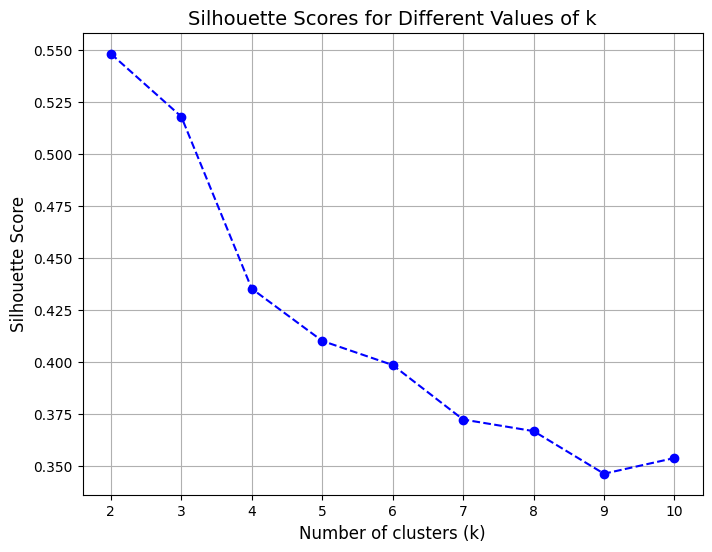

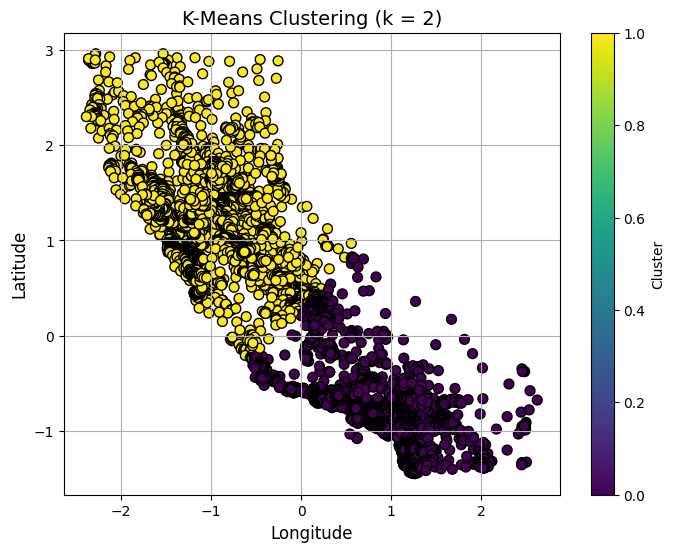

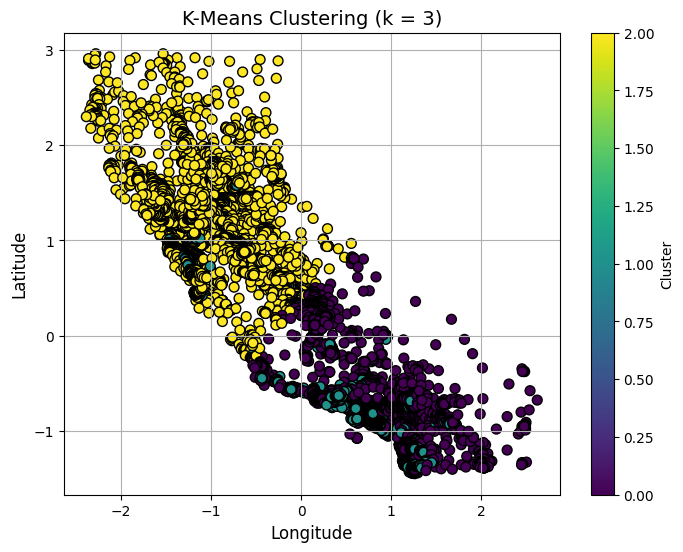

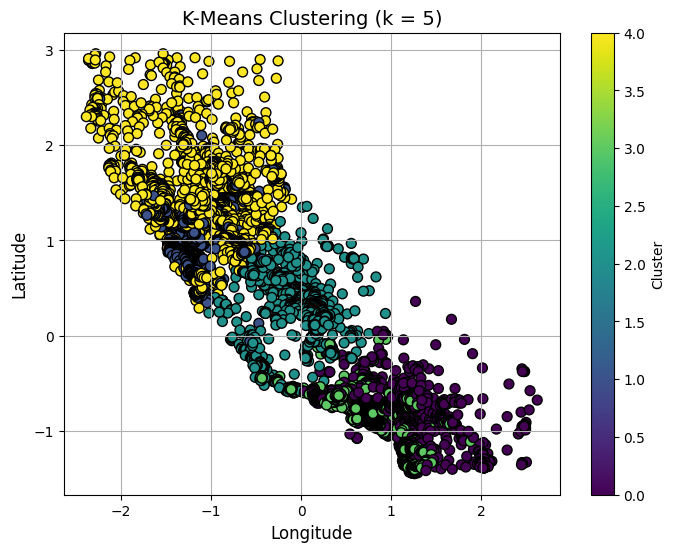

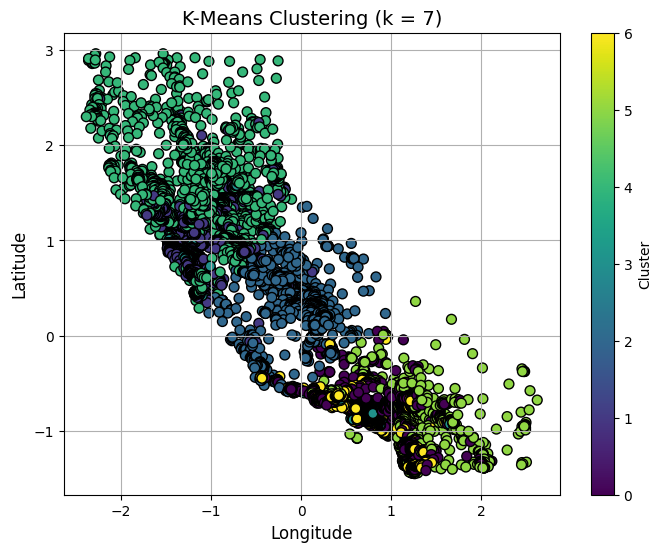

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the California Housing dataset
california = fetch_california_housing(as_frame=True)
df = california.frame

# Select features for clustering: Longitude, Latitude, and Median Income
X = df[['Longitude', 'Latitude', 'MedInc']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Function to calculate silhouette scores for different values of k
def calculate_silhouette_scores(X, max_k=10):
    silhouette_scores = []
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)
        score = silhouette_score(X, labels)
        silhouette_scores.append(score)
        print(f'For k = {k}, Silhouette Score = {score}')
    return silhouette_scores

# Calculate silhouette scores for k from 2 to 10
silhouette_scores = calculate_silhouette_scores(X_scaled, max_k=10)
# Plot silhouette scores to identify the optimal k
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', color='b')
plt.title('Silhouette Scores for Different Values of k', fontsize=14)
plt.xlabel('Number of clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.grid(True)
plt.show()
# Function to perform KMeans clustering and plot the clusters
def plot_clusters(X, n_clusters):
    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_

    # Create scatter plot (Longitude, Latitude) with color-coded clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
    plt.title(f'K-Means Clustering (k = {n_clusters})', fontsize=14)
    plt.xlabel('Longitude', fontsize=12)
    plt.ylabel('Latitude', fontsize=12)
    plt.colorbar(label='Cluster')
    plt.grid(True)
    plt.show()

# Visualize clusters for different values of k (e.g., k =2, 3, 5, 7)
for k in [2,3, 5, 7]:
    plot_clusters(X_scaled, k)
